In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
#SELECT THE CITY:
#city, lat, longit, GMT = 'North Pole', 89.9, 0, 0
#city, lat, longit, GMT = 'Alert', 82, 62, 4
#city, lat, longit, GMT = 'Qanaaq', 77, 69, 4

#ARCTIC
#city, lat, longit, GMT = 'Reykjavic', 66.57, 21, 1
#city, lat, longit, GMT = 'Amsterdam', 52, 4, 0
#city, lat, longit, GMT = 'Bienne', 46.5, 6, 1
city, lat, longit, GMT = 'Lugano', 46.01, 8.96, 1 
#city, lat, longit, GMT = 'Athens', 37, 20, 1
#city, lat, longit, GMT = 'Shangai', 31.01, 121, 8

#TROPIC
#city, lat, longit, GMT = 'Dubai', 23.43, 55, 4
#city, lat, longit, GMT = 'Bogota', 15.36, 74.05, 5
#city, lat, longit, GMT = 'Nairobi', 1, 36, 3
#city, lat, longit, GMT = 'Equador', 0.01, 18, 1

#city, lat, longit, GMT = 'Mar Del Plata', -38, -57, 4
#city, lat, longit, GMT = 'Ushuaia', -54, -68, 4
#city, lat, longit, GMT = 'Cape Town', -55, 22, 3

In [3]:
DLS=0
stilo = 6.3
tilt = 23.43
size = 25

local_time = range (7, 19)
angles = [0]*12
sun_altitude = [0]*12
length_shade = [0]*12
S1 = [0]*12
S2 = [0]*12
W1 = [0]*12
W2 = [0]*12
temp = [0]*12

A = [0, stilo/math.tan(math.radians(lat))]
B = [0, 0]
C = [0, -stilo/math.tan(math.radians(90-lat+tilt))]
D = [0, -stilo/math.tan(math.radians(90-lat))]
E = [0, -stilo/math.tan(math.radians(90-lat-tilt))]
F = [stilo, 0]

In [4]:
# CALCULATE ANGLES
for i in range (len(local_time)):
    angles[i] = math.degrees(math.atan(math.tan(math.radians(longit+15*(local_time[i]-12-GMT)))*math.sin(math.radians(lat))))

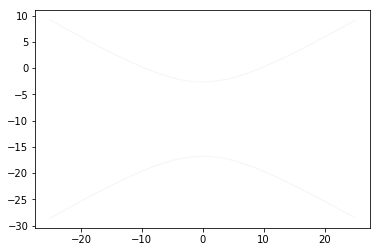

In [5]:
# CALCULATE SUMMER SOLSTICE

for i in range (len(local_time)):
    sun_altitude[i] = math.degrees(math.asin(math.cos(math.radians((local_time[i]-12)*15-(GMT*15-longit)))*math.cos(math.radians(lat))*math.cos(math.radians(tilt))+math.sin(math.radians(lat))*math.sin(math.radians(tilt))))
    length_shade[i] = stilo/math.tan(math.radians(sun_altitude[i]))
    temp[i] = angles[i]+math.degrees(math.asin(A[1]/length_shade[i]*math.sin(math.radians(angles[i])))) 
    S1[i] = length_shade[i]*math.sin(math.radians(temp[i]))
    S2[i] = length_shade[i]*math.cos(math.radians(temp[i]))

# y = -stilo * sin(lat)cos(lat)+sin(tilt)*sqrt(x**2*(cos(lat)*cos(lat)-sin(tilt)*sin(tilt))+stilo**2 * cos(tilt)*cos(tilt)))/sin(tilt)*sin(tilt) - cos(lat)*cos(lat)
x = np.arange(-size, size, 0.01)
s = -(-stilo * np.sin(np.radians(lat))*np.cos(np.radians(lat)) + np.sin(np.radians(tilt)) * np.sqrt(((x**2 * (np.cos(np.radians(lat))*np.cos(np.radians(lat))-np.sin(np.radians(tilt))*np.sin(np.radians(tilt))) + stilo**2 * np.cos(np.radians(tilt))*np.cos(np.radians(tilt))))))/(np.sin(np.radians(tilt))*np.sin(np.radians(tilt)) - np.cos(np.radians(lat))*np.cos(np.radians(lat))) 
line, = plt.plot(x, s, lw=1, zorder=1, color = 'whitesmoke')
s2 = -(-stilo * np.sin(np.radians(lat))*np.cos(np.radians(lat)) + np.sin(np.radians(-tilt)) * np.sqrt(((x**2 * (np.cos(np.radians(lat))*np.cos(np.radians(lat))-np.sin(np.radians(-tilt))*np.sin(np.radians(-tilt))) + stilo**2 * np.cos(np.radians(-tilt))*np.cos(np.radians(-tilt))))))/(np.sin(np.radians(-tilt))*np.sin(np.radians(-tilt)) - np.cos(np.radians(lat))*np.cos(np.radians(lat))) 
line2, = plt.plot(x, s2, lw=1, zorder=1, color = 'whitesmoke')

In [6]:
# CALCULATE WINTER SOLSTICE
    
for j in range (len(local_time)):
    sun_altitude[j] = math.degrees(math.asin(math.cos(math.radians((local_time[j]-12)*15-(GMT*15-longit)))*math.cos(math.radians(lat))*math.cos(math.radians(-tilt))+math.sin(math.radians(lat))*math.sin(math.radians(-tilt))))
    length_shade[j] = stilo/math.tan(math.radians(sun_altitude[j]))
    temp[j] = angles[j]+math.degrees(math.asin(A[1]/length_shade[j]*math.sin(math.radians(angles[j])))) 
    if sun_altitude[j] >= 0:
        W1[j] = length_shade[j]*math.sin(math.radians(temp[j]))
        W2[j] = length_shade[j]*math.cos(math.radians(temp[j]))
    elif sun_altitude[j] < 0:
        W1[j] = -(A[1]+size)/math.tan(math.radians(90+angles[j]))
        W2[j] = size
        

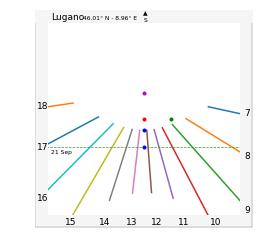

In [7]:
 
plt.text(-size+3.7, size-2.1, city, fontsize='9')
plt.text(-size+11, size-2.1, u'%.2f° N - %.2f° E ' % (lat, longit), fontsize='6')

plt.plot(A[0], A[1], 'm.')
plt.plot(B[0], B[1], 'r.')
plt.plot(C[0], C[1], 'b.')
plt.plot(D[0], D[1], 'b.')
plt.plot(F[0], F[1], 'g.')

for i in range (len(local_time)):
    z=1.4
    if local_time[i]== 11:
       z=3
    plt.plot([-S1[i], -W1[i]],[-S2[i], -W2[i]], zorder=1)

plt.plot([-size, size],[D[1], D[1]], zorder=1, linestyle='--', linewidth=0.7)

plt.text(-size+0.4, A[1]-(size-0.4)*(S2[11]-W2[11])/(S1[11]-W1[11]), '%d' %(18+DLS), fontsize='9')
plt.text(-size+0.4, A[1]-(size-0.4)*(S2[10]-W2[10])/(S1[10]-W1[10]), '%d' %(17+DLS), fontsize='9')
plt.text(-size+0.4, A[1]-(size-0.4)*(S2[9]-W2[9])/(S1[9]-W1[9]), '%d' %(16+DLS), fontsize='9')

plt.text(((-size+0.8)-A[1])/((S2[8]-W2[8])/(S1[8]-W1[8]))-0.6, -size+0.8, '%d' %(15+DLS), fontsize='9')
plt.text(((-size+0.8)-A[1])/((S2[7]-W2[7])/(S1[7]-W1[7]))-0.6, -size+0.8, '%d' %(14+DLS), fontsize='9')
plt.text(((-size+0.8)-A[1])/((S2[6]-W2[6])/(S1[6]-W1[6]))-0.6, -size+0.8, '%d' %(13+DLS), fontsize='9')
plt.text(((-size+0.8)-A[1])/((S2[5]-W2[5])/(S1[5]-W1[5]))-0.6, -size+0.8, '%d' %(12+DLS), fontsize='9')
plt.text(((-size+0.8)-A[1])/((S2[4]-W2[4])/(S1[4]-W1[4]))-0.6, -size+0.8, '%d' %(11+DLS), fontsize='9')
plt.text(((-size+0.8)-A[1])/((S2[3]-W2[3])/(S1[3]-W1[3]))-0.6, -size+0.8, '%d' %(10+DLS), fontsize='9')

plt.text(size-2, A[1]+(size-0.4)*(S2[0]-W2[0])/(S1[0]-W1[0]), '%d' %(7+DLS), fontsize='9')
plt.text(size-2, A[1]+(size-0.4)*(S2[1]-W2[1])/(S1[1]-W1[1]), '%d' %(8+DLS), fontsize='9')
plt.text(size-2, A[1]+(size-0.4)*(S2[2]-W2[2])/(S1[2]-W1[2]), '%d' %(9+DLS), fontsize='9')

plt.text(-0.2, size-1, u'\u25b2' , fontsize='6')
plt.text(0, size-2.5, 'S' , fontsize='6')
plt.text(-size+3.55, D[1]-1.4, '21 Sep', fontsize='6')

rectangle1 = plt.Rectangle((-size, -size), 3, 2*size, zorder=2, fc='whitesmoke')
rectangle2 = plt.Rectangle((size-3, -size), 3, 2*size, zorder=2, fc='whitesmoke')
rectangle3 = plt.Rectangle((-size, -size), 2*size, 3, zorder=2, fc='whitesmoke')
rectangle4 = plt.Rectangle((-size+2.3, size-3.7), size-12, 0.1, zorder=2, fc='r')
rectangle5 = plt.Rectangle((-size, -size+0.1), 2*size-0.1, 2*size-0.1, zorder=2, fill= False, linewidth=0.2, fc='r')
rectangle6 = plt.Rectangle((-size, size-3), 2*size, 3, zorder=2, fc='whitesmoke')
plt.gca().add_patch(rectangle1)
plt.gca().add_patch(rectangle2)
plt.gca().add_patch(rectangle3)
plt.gca().add_patch(rectangle5)
plt.gca().add_patch(rectangle6)

plt.axis([-size, size, -size, size])
plt.axis('off')
plt.xlim=(-size, size)
plt.ylim=(-size, size)
plt.gca().set_aspect('equal', adjustable='box')
plt.axes()


plt.show()